In [57]:
%load_ext autoreload
%autoreload 2
from dataloader import FakenNewsNet, PolitiFact
from utils import *
import tweepy
import pandas as pd
from os import mkdir, listdir
from contextlib import suppress
from utils import get_twitter_api
from tweepy.errors import NotFound, Forbidden
import json
from os.path import join as joinpath

MAX_TWEETS = 2000
MAX_REQUESTS = 100

api = get_twitter_api()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
status = api.get_retweeter_ids
status[0].retweeted_status

Rate limit reached. Sleeping for: 725


In [21]:
retweet_path = "./dataset/FakeNewsNet/politifact/real/retweets/politifact12944/"
retweets_list = [TwitterNode(f"{retweet_path}/{filename}") for filename in listdir(retweet_path)]

tweet_path = "./dataset/FakeNewsNet/politifact/real/tweets/politifact12944/"
tweets_list = [TwitterNode(f"{tweet_path}/{filename}") for filename in listdir(tweet_path)]

In [29]:
from spektral.datasets.ogb import OGB
from ogb.graphproppred import PygGraphPropPredDataset

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


ImportError: cannot import name 'PygGraphPropPredDataset' from 'ogb.graphproppred' (C:\Users\Marco\AppData\Local\Programs\Python\Python39\lib\site-packages\ogb\graphproppred\__init__.py)

In [36]:
path = "./dataset/politifact/"
A = load_edge_list(joinpath(path, "A.txt"), sep=", ")
node_graph_id = np.load(joinpath(path, "node_graph_id.npy"))

In [45]:
# split adjacency matrix in subgraphs
graphs = defaultdict(list)

for edge in A:
    idx = node_graph_id[edge[0]]    # graph ID of edge
    graphs[idx].append(edge)
    

In [41]:
from scipy.sparse import load_npz

features = load_npz(joinpath(path, "new_profile_feature.npz")).todense()

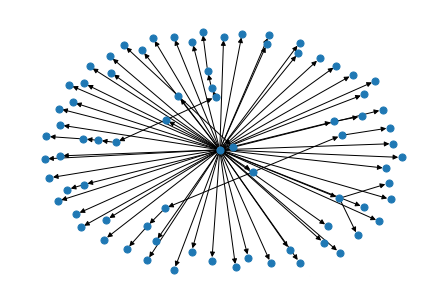

In [49]:
G = nx.from_edgelist(graphs[100], create_using=nx.DiGraph)
nx.draw(G, node_size=50)

In [56]:
np.load(joinpath(path, "graph_labels.npy")).shape

(314,)

In [59]:
dataset = PolitiFact()

In [70]:
bert = load_npz(joinpath(path, "new_bert_feature.npz")).todense()
spacey = load_npz(joinpath(path, "new_spacy_feature.npz")).todense()
content = load_npz(joinpath(path, "new_content_feature.npz")).todense()
profile = load_npz(joinpath(path, "new_profile_feature.npz")).todense()

In [71]:
bert.shape, spacey.shape, content.shape, profile.shape

((41054, 768), (41054, 300), (41054, 310), (41054, 10))

In [77]:
import numpy as np
np.concatenate((bert[1], spacey[1]), axis=1).shape

(1, 1068)